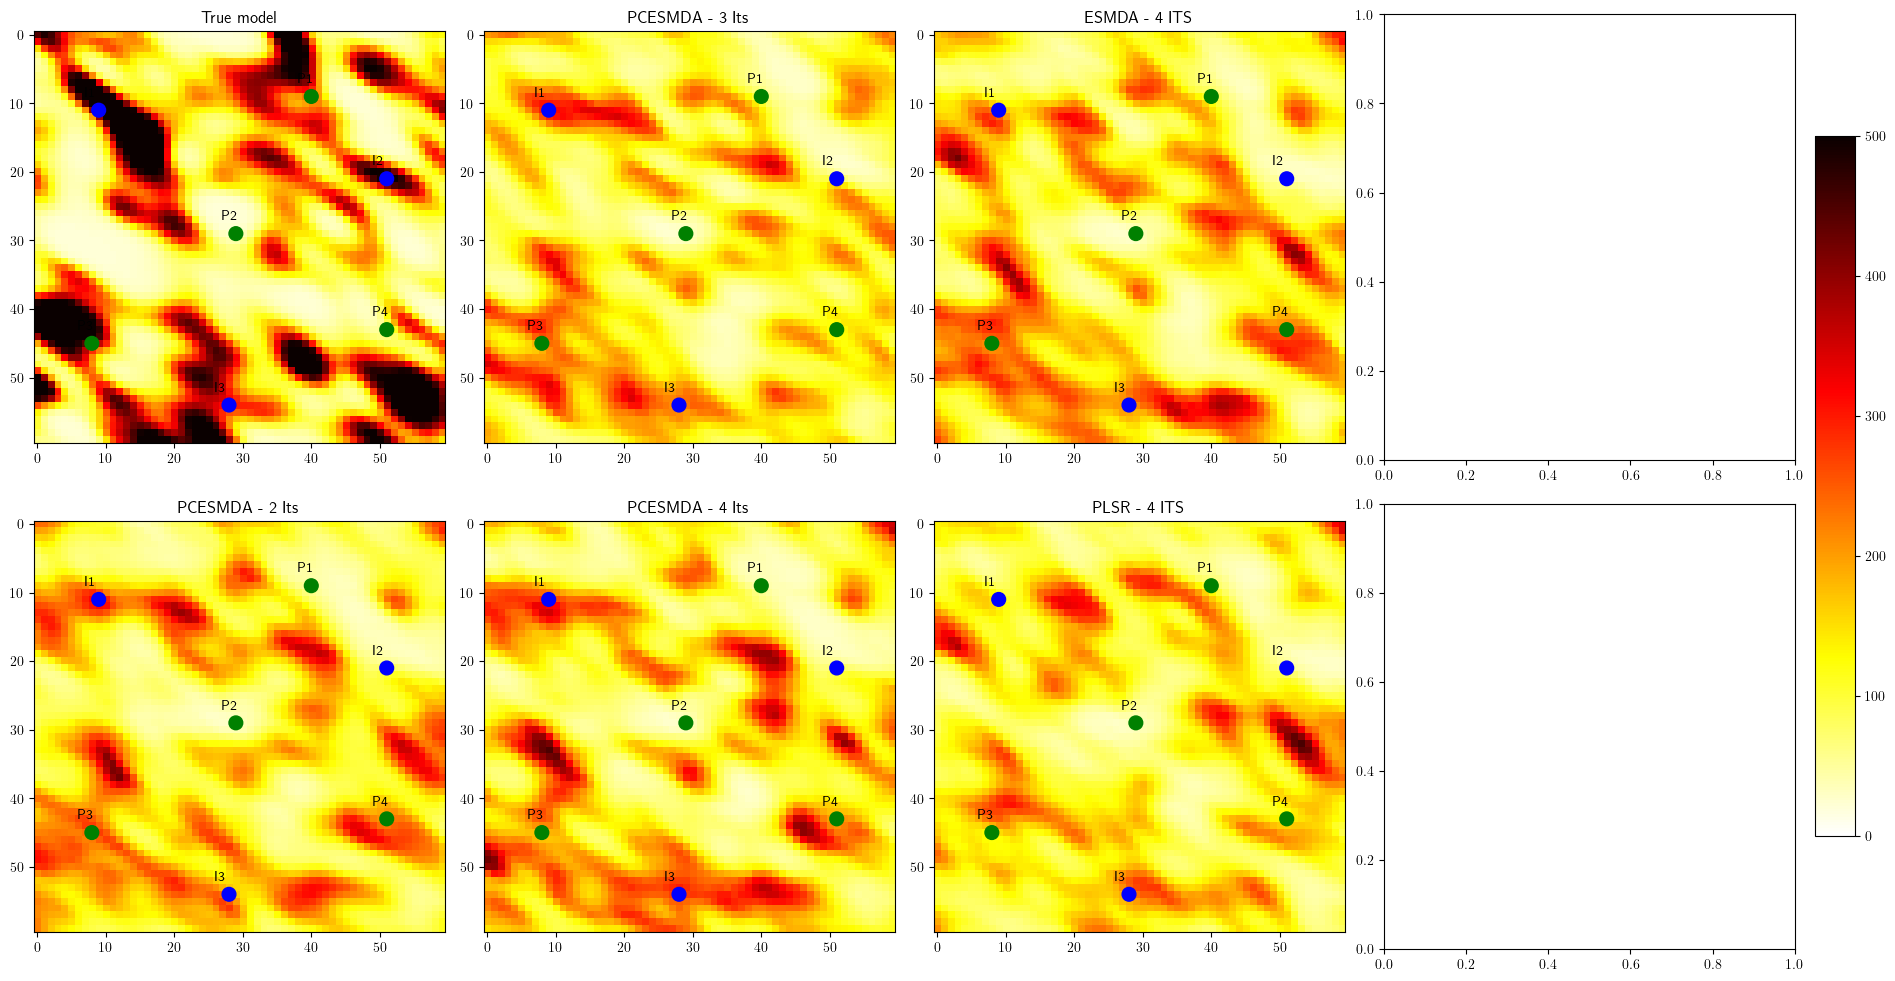

In [136]:
import numpy as np 
import os
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

from matplotlib.patches import Circle

globalfolder = f"./figs/npys"

j = 6
studynames = [f"PCESMDA_1_ITS_{j}",
              f"PCESMDA_2_ITS_{j}",
              f"PCESMDA_3_ITS_{j}",
              f"PCESMDA_4_ITS_{j}",
              f"ESMDA_2_ITS_{j}",
              f"ESMDA_4_ITS_{j}",
              f"PLSR_4_ITS_{j}"]

indexing = {
    0: (1,0),
    1: (0,1),
    2: (1,1),
    3: (0,2),
    4: (1,2),
    5: (0,3),
    6: (1,3),
}

naming = {
    0: "PCESMDA - 2 Its",
    1: "PCESMDA - 3 Its",
    2: "PCESMDA - 4 Its",
    3: "ESMDA - 4 ITS",
    4: "PLSR - 4 ITS",
    5: "PCA - 4 Its - 2 PO",
    6: "PCA - 4 Its - 1 PO"
}

wells = {
    'I1' : (9, 11, 'blue'),
    'I2' : (51, 21, 'blue'),
    'I3' : (28, 54, 'blue'),
    'P1' : (40, 9, 'green'),
    'P2' : (29, 29, 'green'), 
    'P3' : (8, 45, 'green'),
    'P4' : (51, 43, 'green')
}

fig, ax = plt.subplots(2,4, figsize=(20,10))
for k, studyname in enumerate(studynames):
    
    i,j = indexing[k]
    foldername = os.path.join(globalfolder, studyname)
    ave2dProp = np.load(os.path.join(foldername, '2dpropPost.npy'))
    cm = ax[i,j].imshow(ave2dProp, cmap='hot_r', vmin=0, vmax=500)
    ax[i,j].set_title(naming[k])
    
    for wellname in wells.keys():
        circ = Circle((wells[wellname][0],wells[wellname][1]),1,color=wells[wellname][2])
        ax[i,j].add_patch(circ)
        ax[i,j].text(wells[wellname][0]-2.0,wells[wellname][1]-2.0, wellname)

fakehistory_path = f'./data/SPE10/spe10model2/historic_data/'
permx_hist = np.load(os.path.join(fakehistory_path, 'static3d', 'PERMX.npy'))
cm = ax[0,0].imshow(permx_hist.reshape((60, 60, 1), order='F')[:, :, 0], vmin=0, vmax=500, cmap='hot_r')
ax[0,0].set_title("True model")

for wellname in wells.keys():
    circ = Circle((wells[wellname][0],wells[wellname][1]),1,color=wells[wellname][2])
    ax[0,0].add_patch(circ)
    ax[0,0].text(wells[wellname][0]-2.0,wells[wellname][1]-2.0, wellname)

fig.tight_layout()
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
fig.subplots_adjust(right=0.9)
fig.colorbar(cm, cax=cbar_ax)



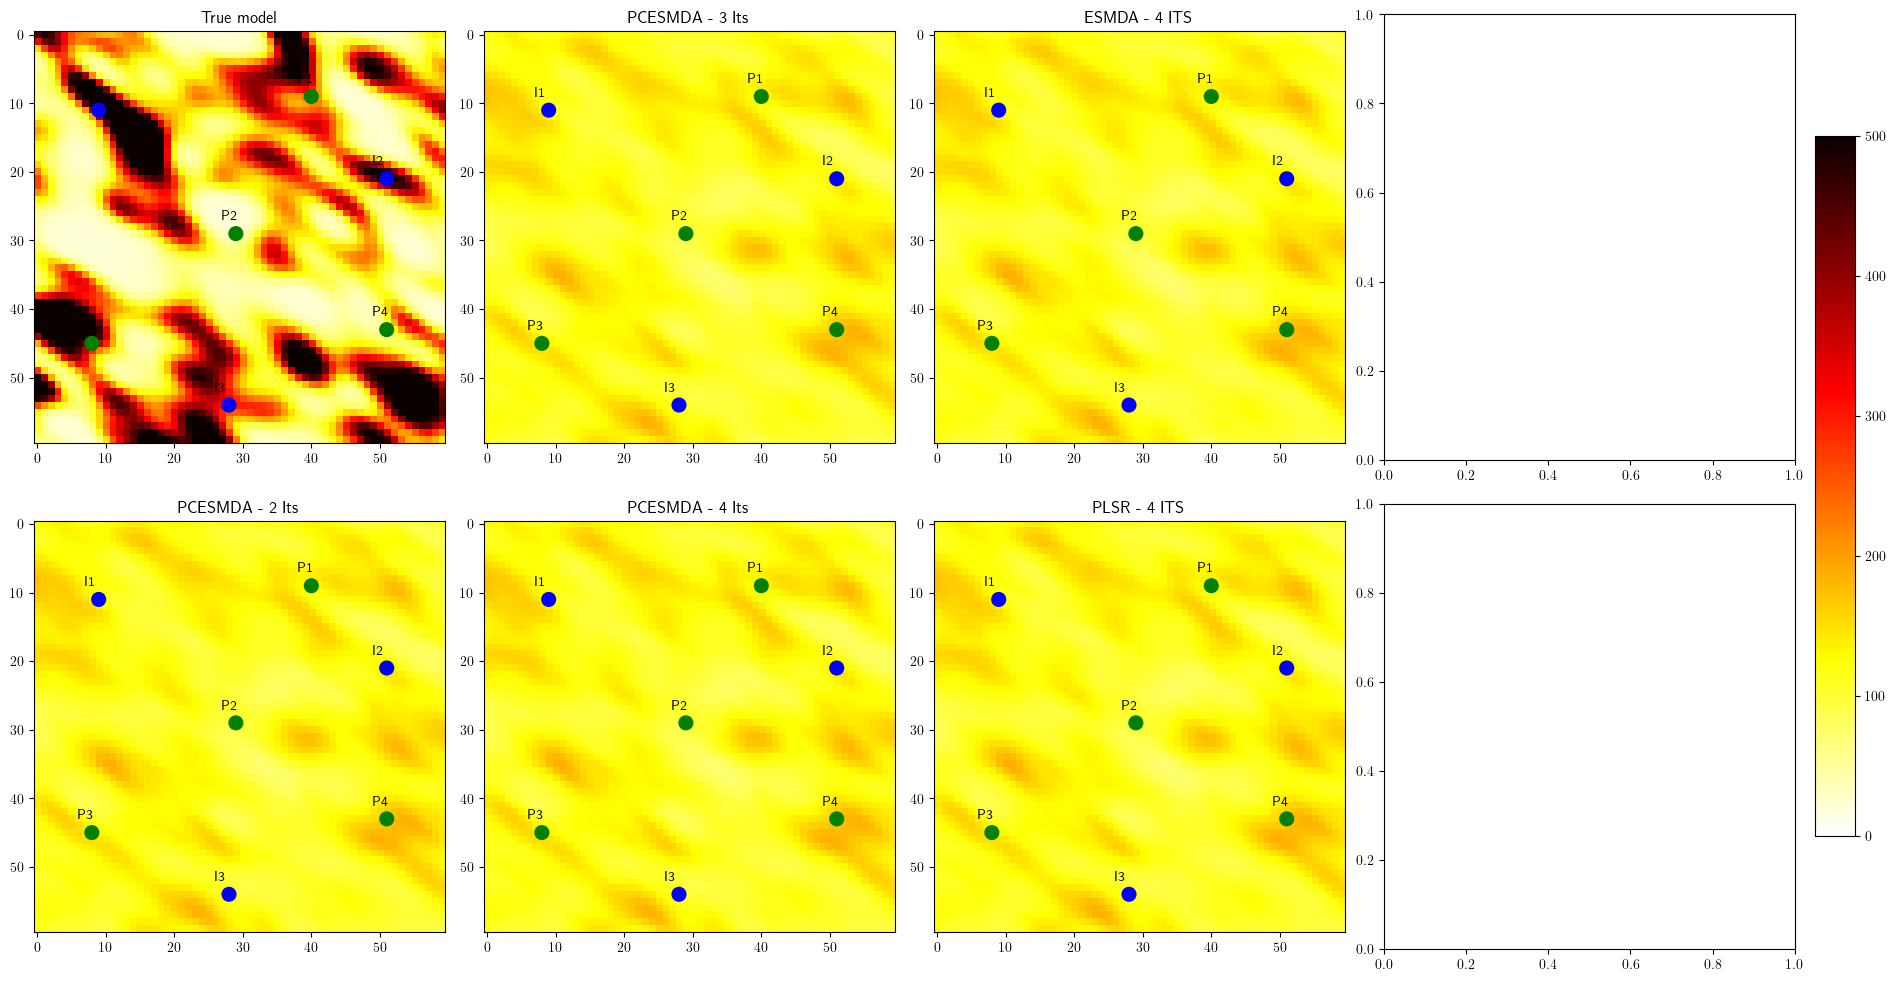

In [137]:
fig, ax = plt.subplots(2,4, figsize=(20,10))
for k, studyname in enumerate(studynames):
    
    i,j = indexing[k]
    foldername = os.path.join(globalfolder, studyname)
    ave2dProp = np.load(os.path.join(foldername, '2dpropPrior.npy'))
    cm = ax[i,j].imshow(ave2dProp, cmap='hot_r', vmin=0, vmax=500)
    ax[i,j].set_title(naming[k])
    
    for wellname in wells.keys():
        circ = Circle((wells[wellname][0],wells[wellname][1]),1,color=wells[wellname][2])
        ax[i,j].add_patch(circ)
        ax[i,j].text(wells[wellname][0]-2.0,wells[wellname][1]-2.0, wellname)

fakehistory_path = f'./data/SPE10/spe10model2/historic_data/'
permx_hist = np.load(os.path.join(fakehistory_path, 'static3d', 'PERMX.npy'))
cm = ax[0,0].imshow(permx_hist.reshape((60, 60, 1), order='F')[:, :, 0], vmin=0, vmax=500, cmap='hot_r')
ax[0,0].set_title("True model")

for wellname in wells.keys():
    circ = Circle((wells[wellname][0],wells[wellname][1]),1,color=wells[wellname][2])
    ax[0,0].add_patch(circ)
    ax[0,0].text(wells[wellname][0]-2.0,wells[wellname][1]-2.0, wellname)

fig.tight_layout()
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
fig.subplots_adjust(right=0.9)
fig.colorbar(cm, cax=cbar_ax)

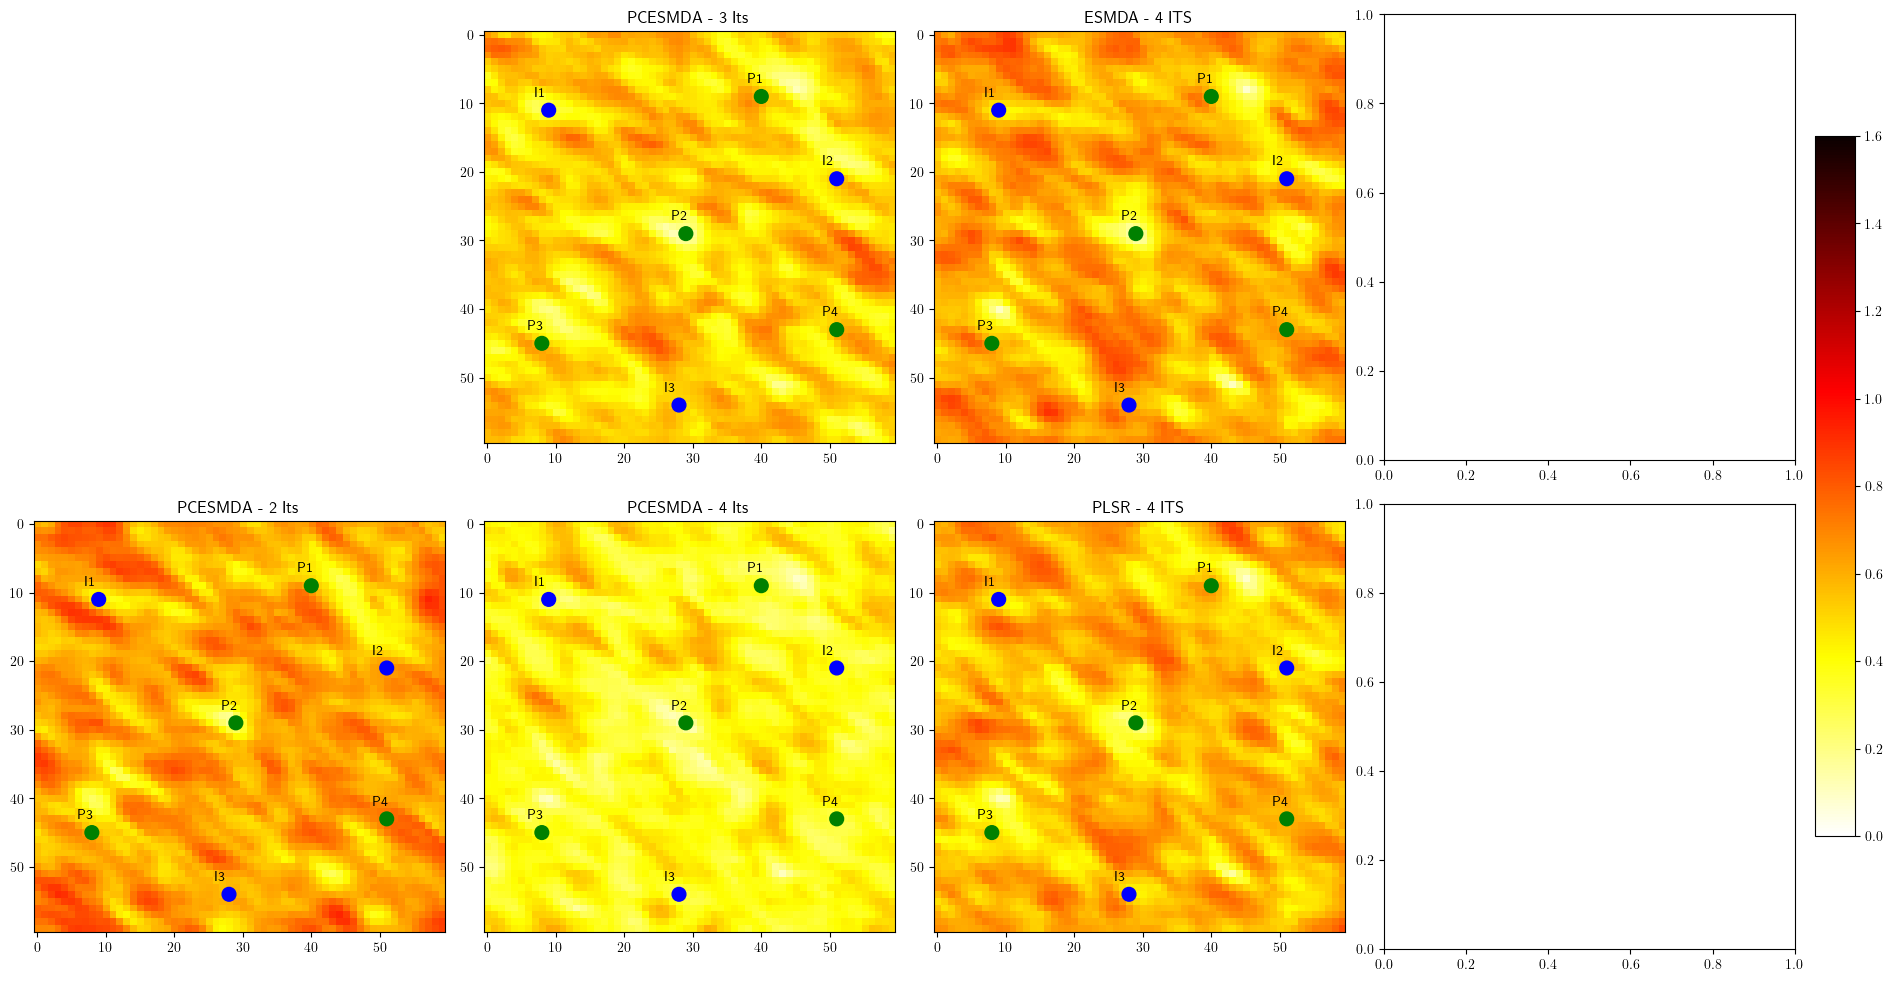

In [138]:
# calculate standard deviation

fig, ax = plt.subplots(2,4, figsize=(20,10))
for k, studyname in enumerate(studynames):
    
    i,j = indexing[k]
    foldername = os.path.join(globalfolder, studyname)
    
    arrs = []
    for kk in range(32):
        filename = f"2dprop_{kk}.npy"
        arr = np.load(os.path.join(foldername, filename))
        arrs.append(arr)
        
    arrs = np.std(np.log(arrs), axis=0)
    cm = ax[i,j].imshow(arrs, cmap='hot_r', vmin=0.0, vmax=1.6)
    ax[i,j].set_title(naming[k])
    
    for wellname in wells.keys():
        circ = Circle((wells[wellname][0],wells[wellname][1]),1,color=wells[wellname][2])
        ax[i,j].add_patch(circ)
        ax[i,j].text(wells[wellname][0]-2.0,wells[wellname][1]-2.0, wellname)
    # fig.colorbar(cm, ax=ax[i,j])
    
ax[0,0].axis('off')

fig.tight_layout()
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
fig.subplots_adjust(right=0.9)
fig.colorbar(cm, cax=cbar_ax)

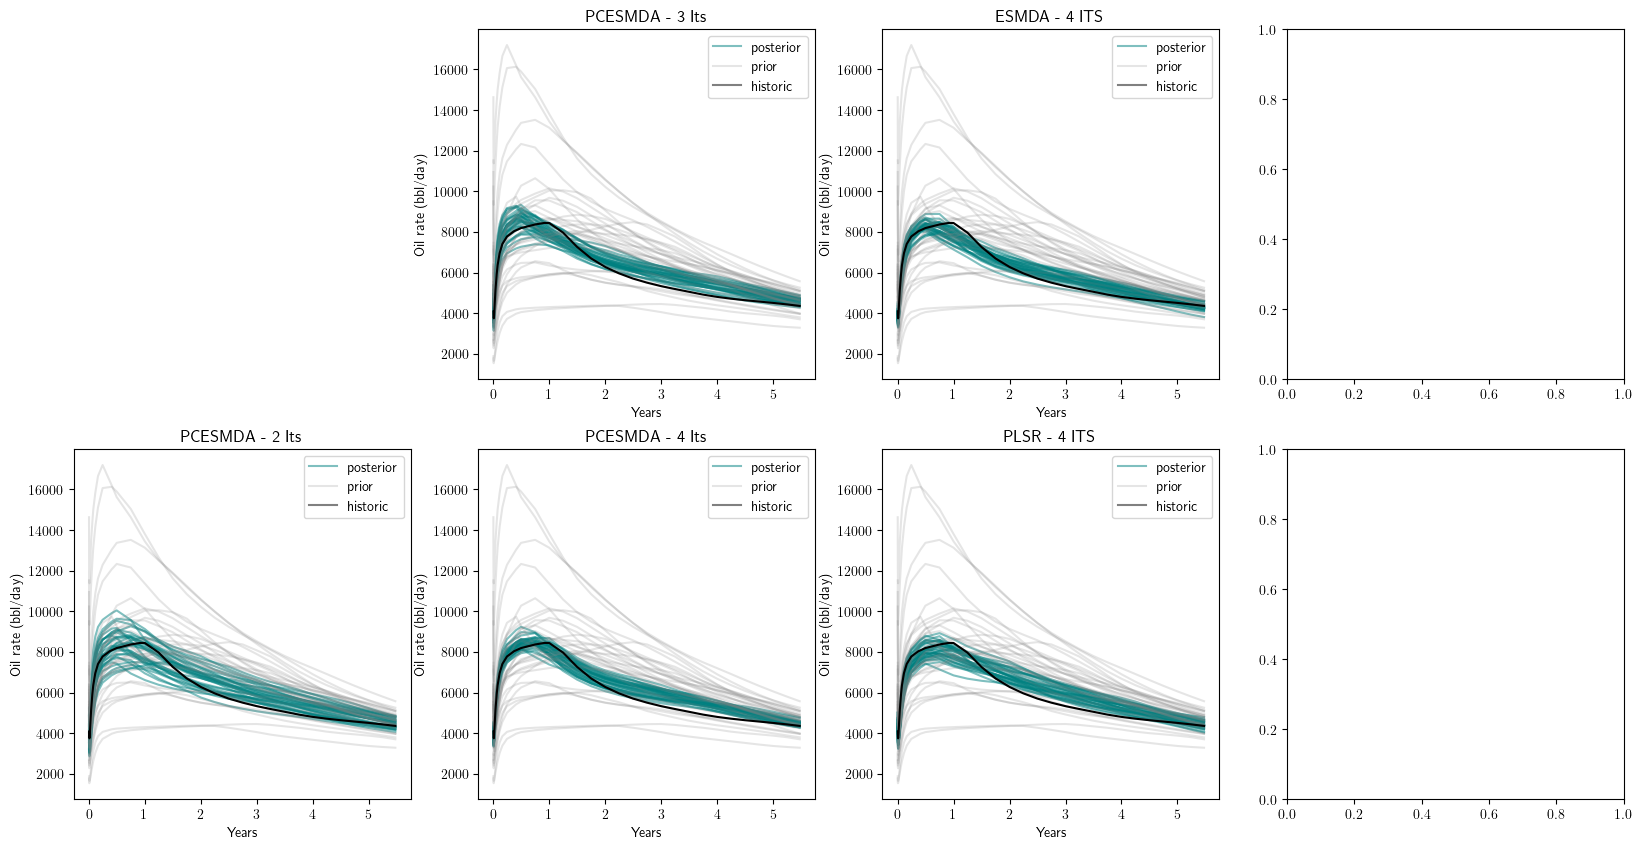

In [139]:
# plot total production

kws = [
    f"WOPR:P1",
    f"WOPR:P2",
    f"WOPR:P3",
    f"WOPR:P4",
]

props = [f"summarypost_{kw}.npy" for kw in kws]
prior_props = [f"summaryprior_{kw}.npy" for kw in kws]

historic_path = f'./data/SPE10/spe10model2/historic_data/'
hist_props = [os.path.join(historic_path, 'summary', f"{kw}.npy") for kw in kws]

fig, ax = plt.subplots(2,4, figsize=(20,10))
ax[0,0].axis('off')
for k, studyname in enumerate(studynames):
    
    i,j = indexing[k]
    foldername = os.path.join(globalfolder, studyname)
    
    arrs = []
    prior_arrs = []
    hist_arrs = []
    for prop, prior_prop, hist_prop in zip(props, prior_props, hist_props):
        filename = f"{prop}"
        arr = np.load(os.path.join(foldername, filename))
        arrs.append(arr)
        
        filename = f"{prior_prop}"
        arr = np.load(os.path.join(foldername, filename))
        prior_arrs.append(arr)
        
        arr = np.load(hist_prop)
        hist_arrs.append(arr)
        
    arrs = np.sum(arrs, axis=0)
    arrs = np.array(arrs).T
    
    prior_arrs = np.sum(prior_arrs, axis=0)
    prior_arrs = np.array(prior_arrs).T
    
    hist_arrs = np.sum(hist_arrs, axis=0)
    hist_arrs = np.array(hist_arrs).T
    hist_years = np.load(os.path.join(historic_path, 'summary', 'YEARS.npy'))

    base_years = np.load(os.path.join(foldername, f"summarypost_YEARS.npy"))
    
    ax[i,j].plot(base_years, arrs, color='teal', alpha=0.5)
    ax[i,j].plot(base_years, prior_arrs, color='gray', alpha=0.2)
    ax[i,j].plot(hist_years, hist_arrs, color='black', alpha=1.0)
    ax[i,j].set_title(naming[k])
    ax[i,j].set_xlabel('Years')
    ax[i,j].set_ylabel('Oil rate (bbl/day)')
    
    ax[i,j].plot([], [], color='teal', alpha=0.5, label='posterior')
    ax[i,j].plot([], [], color='gray', alpha=0.2, label='prior')
    ax[i,j].plot([], [], color='gray', alpha=1.0, label='historic')
    
    ax[i,j].legend()
    
# ax[0,0].plot()

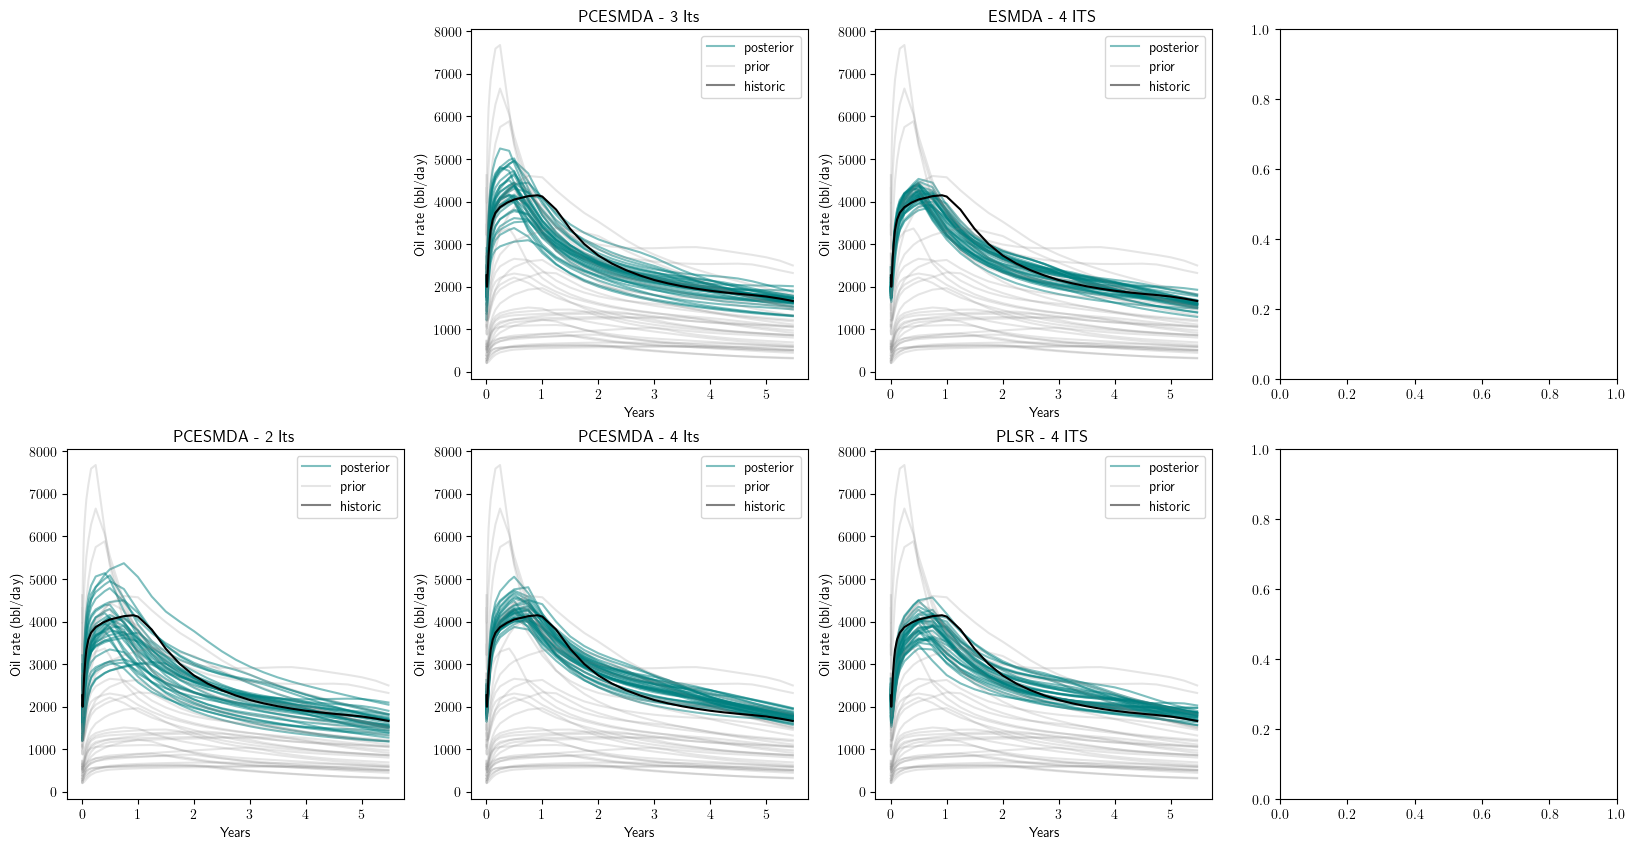

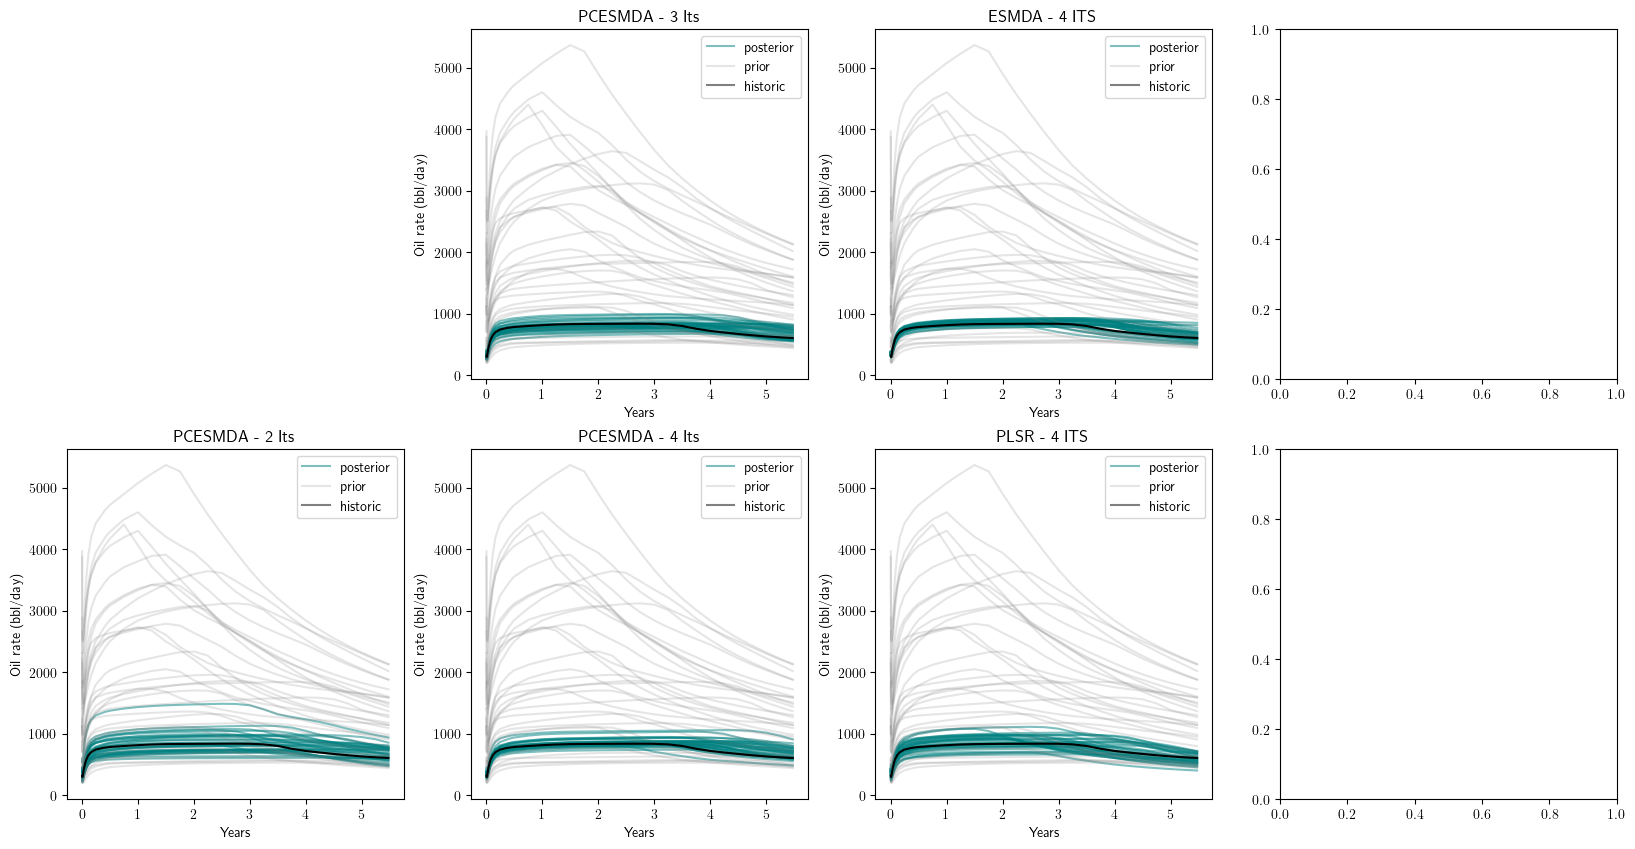

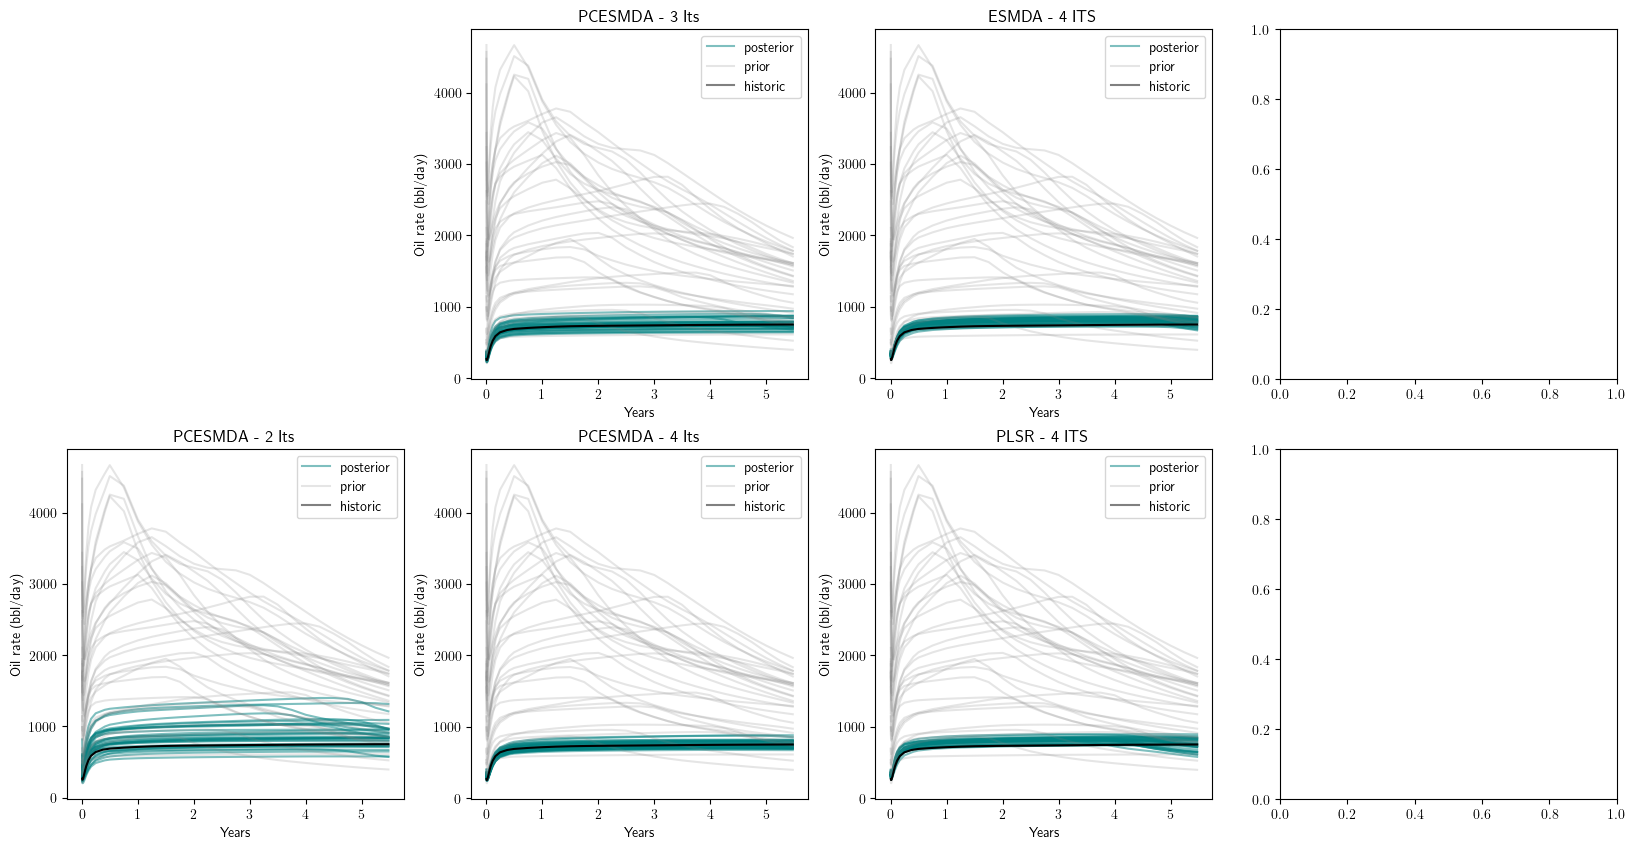

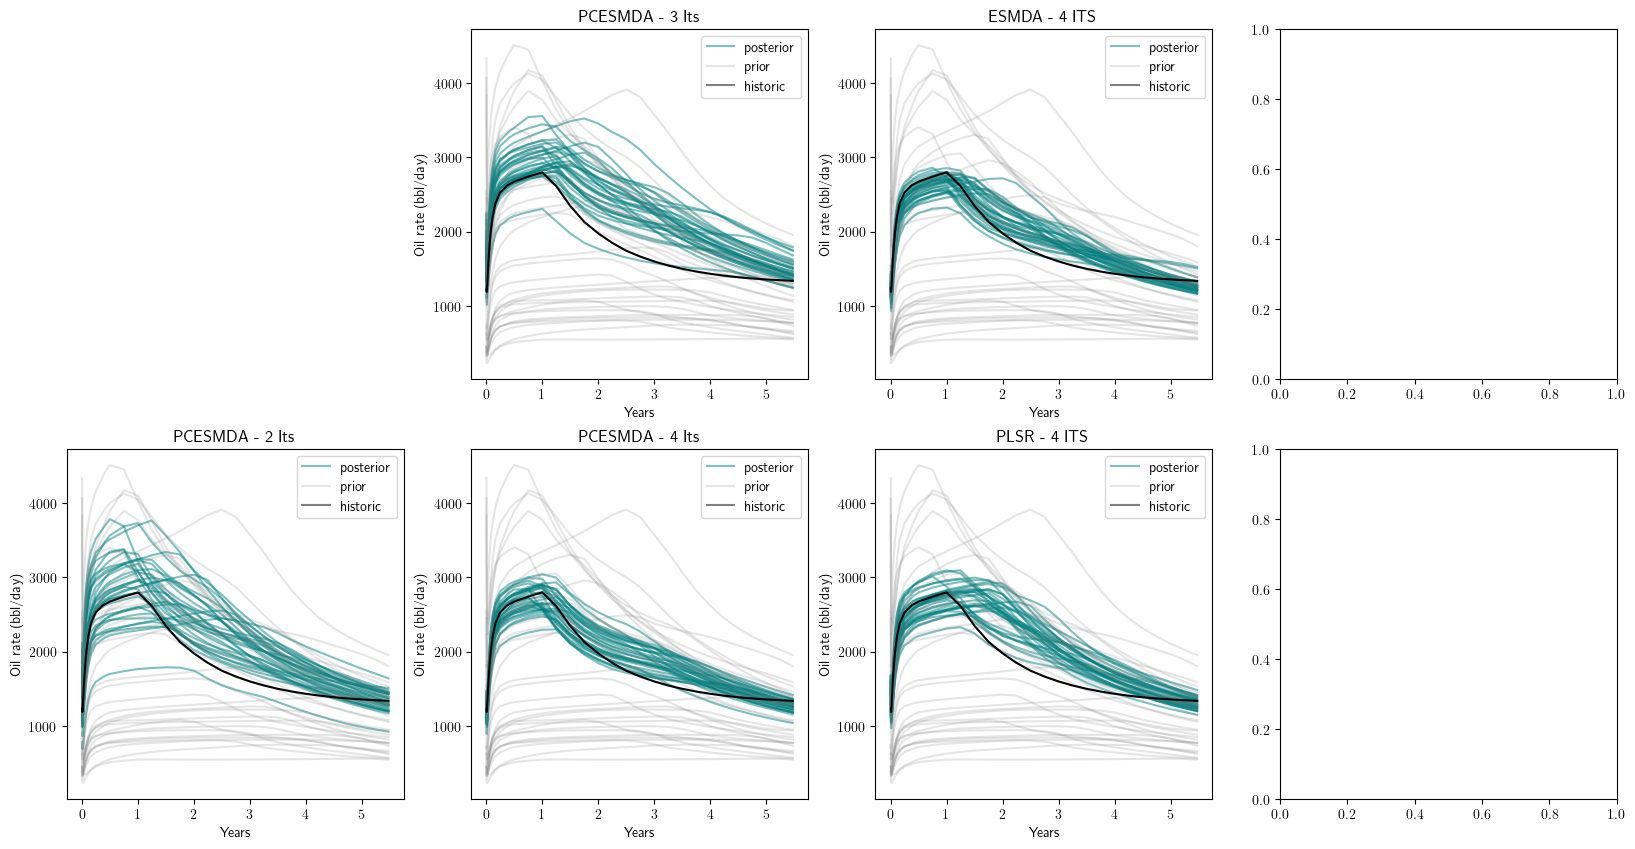

In [140]:
# plot total production

kws = [
    f"WOPR:P1",
    f"WOPR:P2",
    f"WOPR:P3",
    f"WOPR:P4",
]

props = [f"summarypost_{kw}.npy" for kw in kws]
prior_props = [f"summaryprior_{kw}.npy" for kw in kws]

historic_path = f'./data/SPE10/spe10model2/historic_data/'
hist_props = [os.path.join(historic_path, 'summary', f"{kw}.npy") for kw in kws]

for prop, prior_prop, hist_prop in zip(props, prior_props, hist_props):
    fig, ax = plt.subplots(2,4, figsize=(20,10))
    ax[0,0].axis('off')

    for k, studyname in enumerate(studynames):
        
        i,j = indexing[k]
        foldername = os.path.join(globalfolder, studyname)
        
        arrs = []
        prior_arrs = []
        hist_arrs = []
        
        filename = f"{prop}"
        arrs = np.load(os.path.join(foldername, filename))
        
        filename = f"{prior_prop}"
        prior_arrs = np.load(os.path.join(foldername, filename))
        
        hist_arrs = np.load(hist_prop)
            
        arrs = np.array(arrs).T
        
        prior_arrs = np.array(prior_arrs).T
        
        hist_arrs = np.array(hist_arrs).T
        hist_years = np.load(os.path.join(historic_path, 'summary', 'YEARS.npy'))

        base_years = np.load(os.path.join(foldername, f"summarypost_YEARS.npy"))
        
        ax[i,j].plot(base_years, arrs, color='teal', alpha=0.5)
        ax[i,j].plot(base_years, prior_arrs, color='gray', alpha=0.2)
        ax[i,j].plot(hist_years, hist_arrs, color='black', alpha=1.0)
        ax[i,j].set_title(naming[k])
        ax[i,j].set_xlabel('Years')
        ax[i,j].set_ylabel('Oil rate (bbl/day)')
        
        ax[i,j].plot([], [], color='teal', alpha=0.5, label='posterior')
        ax[i,j].plot([], [], color='gray', alpha=0.2, label='prior')
        ax[i,j].plot([], [], color='gray', alpha=1.0, label='historic')
        
        ax[i,j].legend()
    
# ax[0,0].plot()

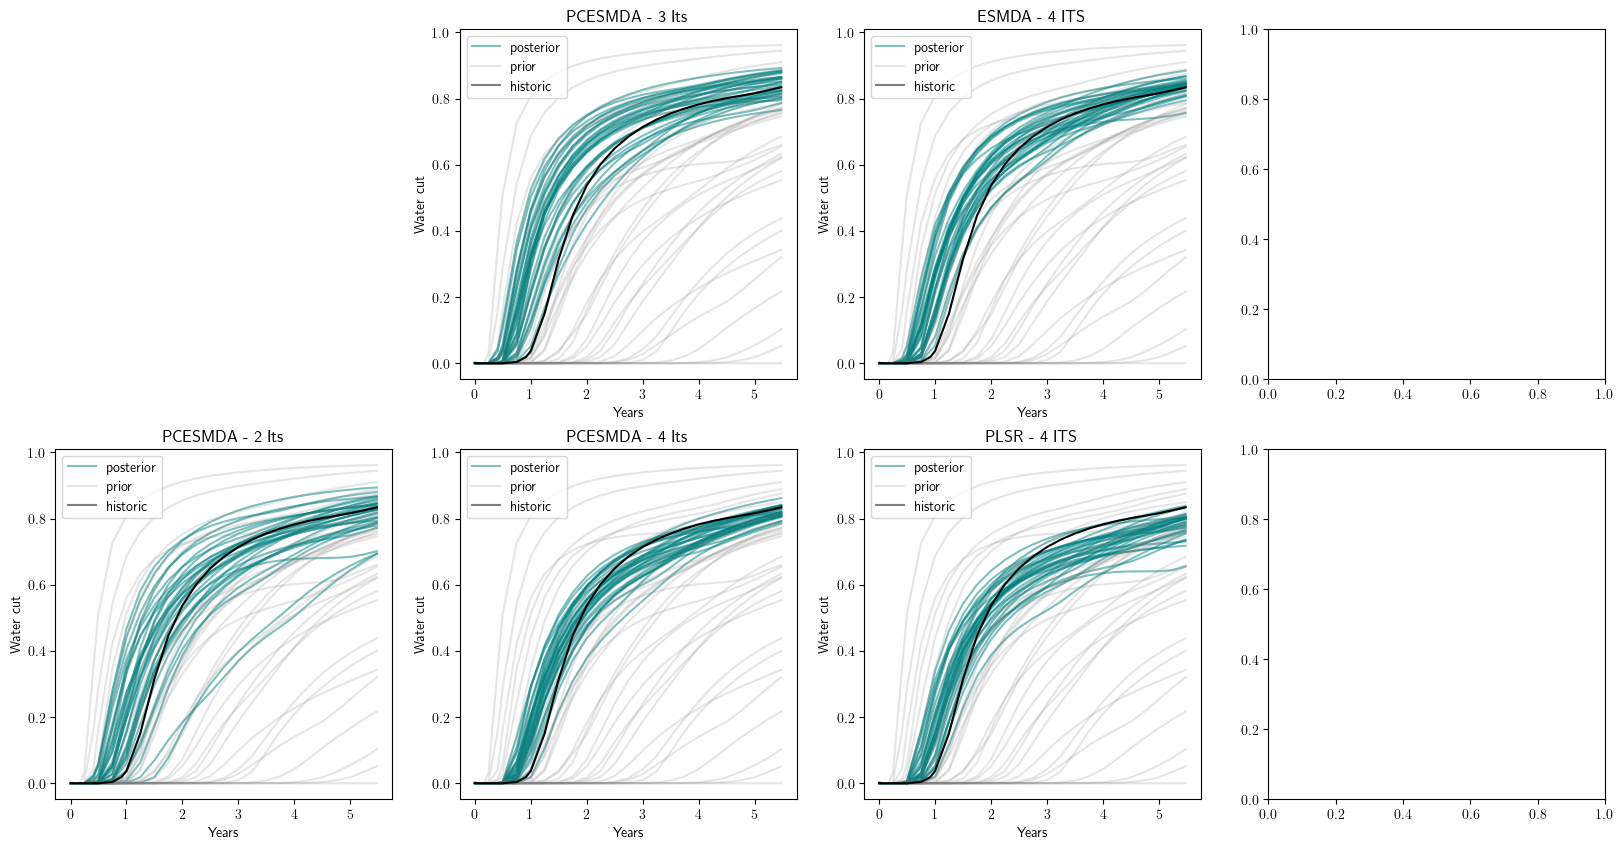

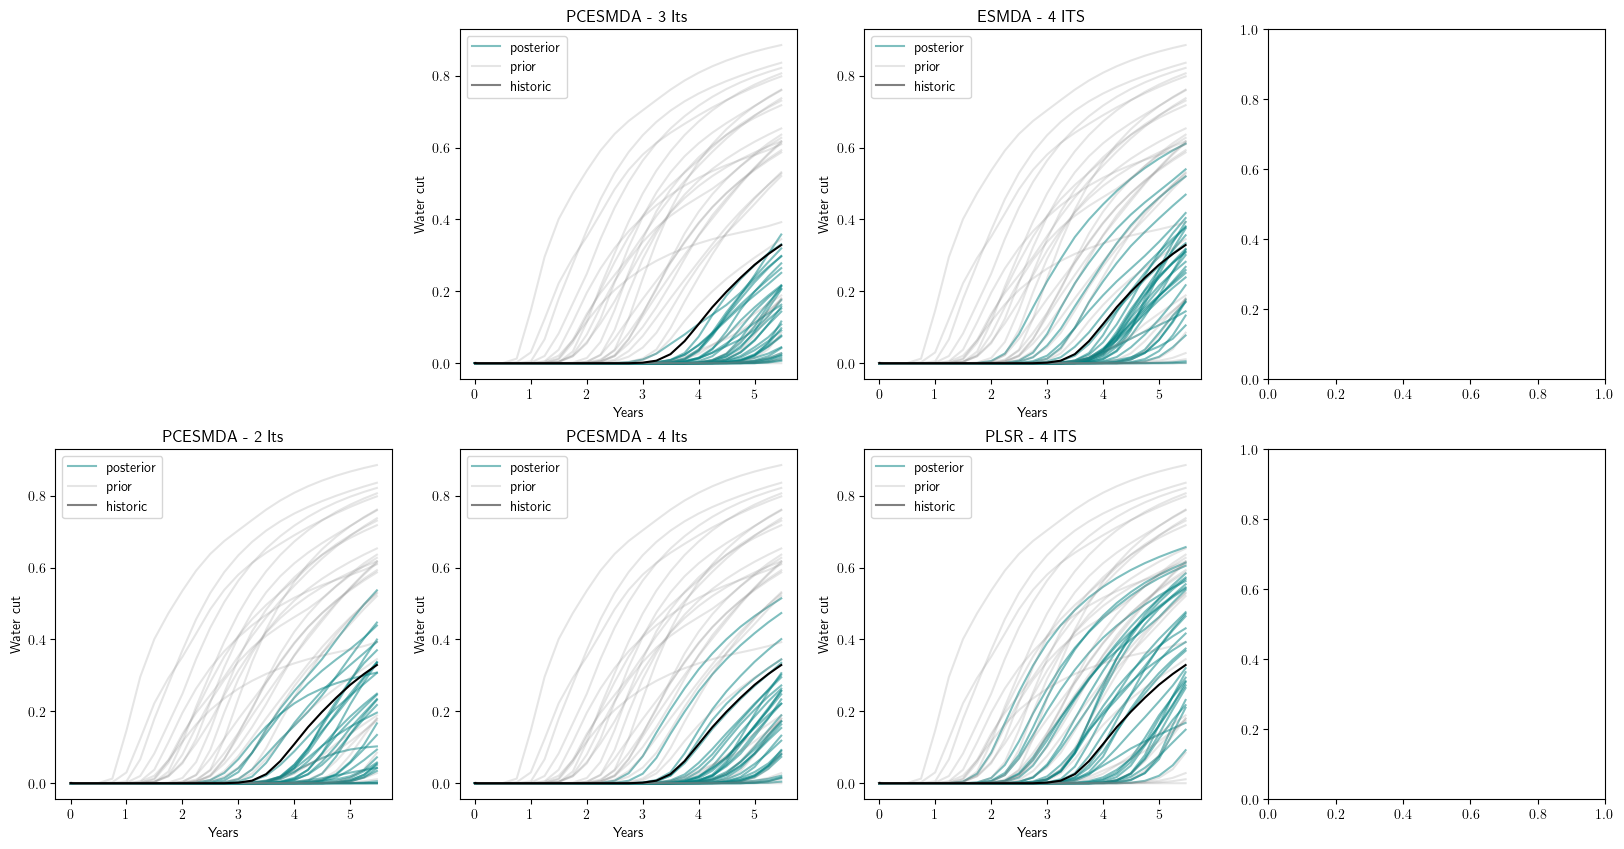

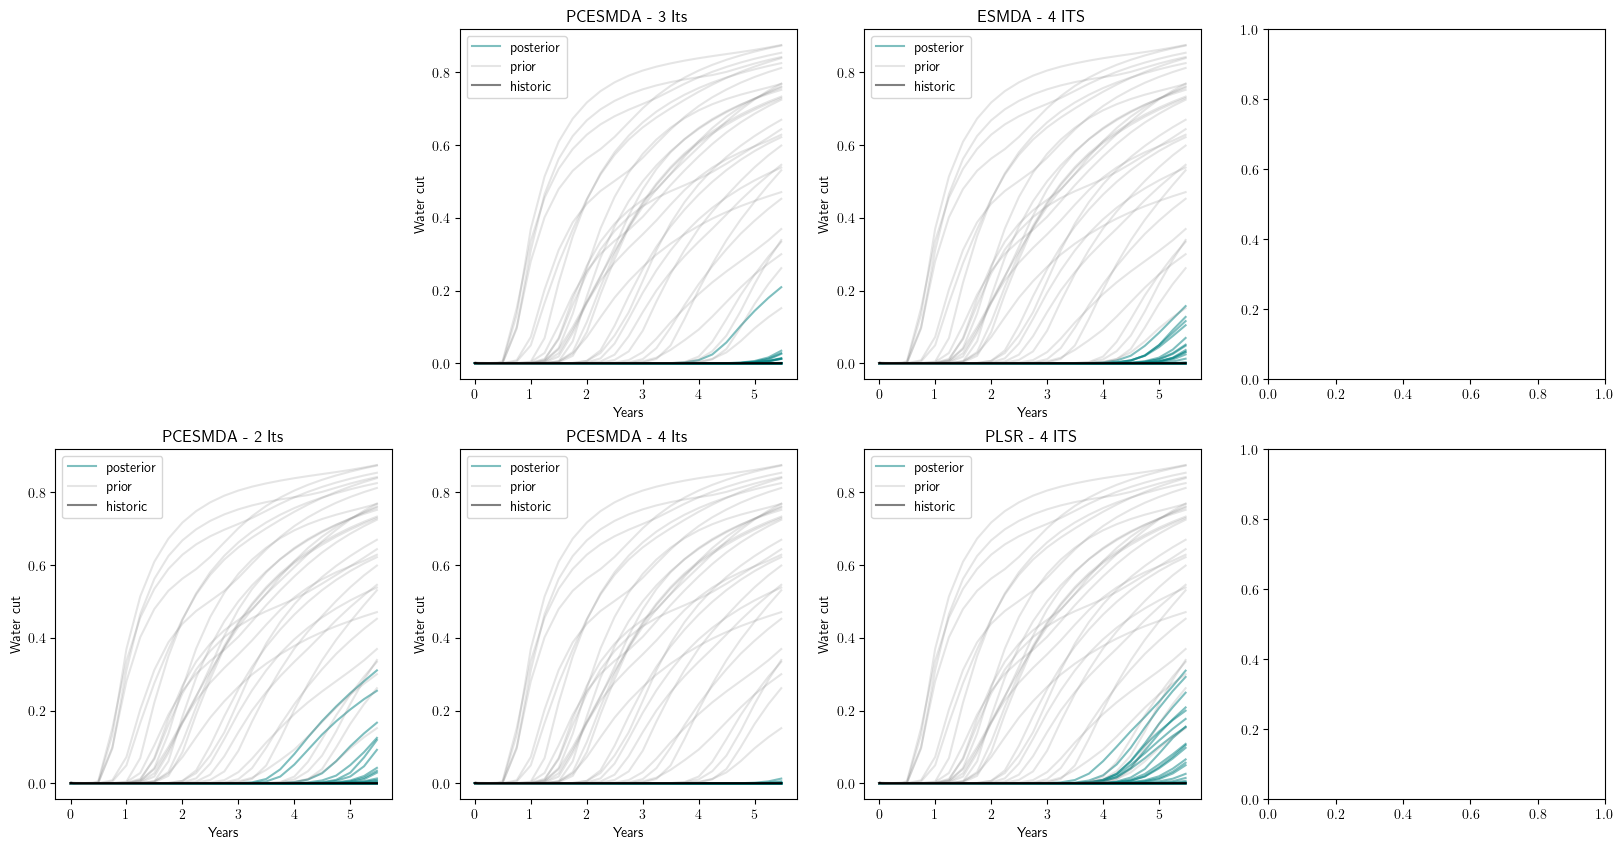

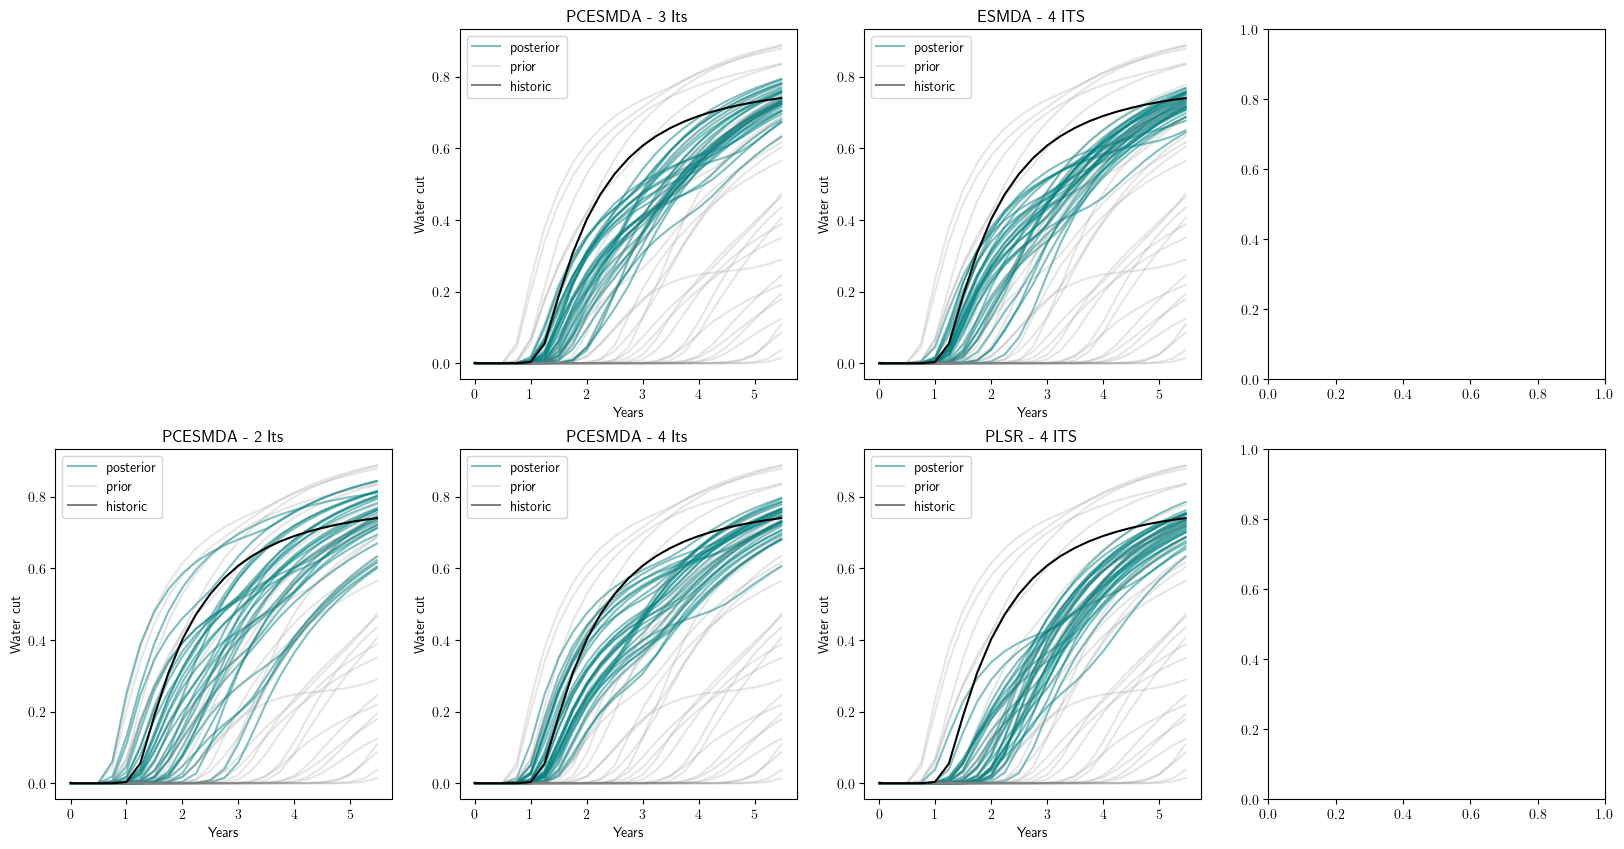

In [141]:
# plot total production

kws = [
    f"WWCT:P1",
    f"WWCT:P2",
    f"WWCT:P3",
    f"WWCT:P4",
]

props = [f"summarypost_{kw}.npy" for kw in kws]
prior_props = [f"summaryprior_{kw}.npy" for kw in kws]

historic_path = f'./data/SPE10/spe10model2/historic_data/'
hist_props = [os.path.join(historic_path, 'summary', f"{kw}.npy") for kw in kws]

for prop, prior_prop, hist_prop in zip(props, prior_props, hist_props):
    fig, ax = plt.subplots(2,4, figsize=(20,10))
    ax[0,0].axis('off')

    for k, studyname in enumerate(studynames):
        
        i,j = indexing[k]
        foldername = os.path.join(globalfolder, studyname)
        
        arrs = []
        prior_arrs = []
        hist_arrs = []
        
        filename = f"{prop}"
        arrs = np.load(os.path.join(foldername, filename))
        
        filename = f"{prior_prop}"
        prior_arrs = np.load(os.path.join(foldername, filename))
        
        hist_arrs = np.load(hist_prop)
            
        arrs = np.array(arrs).T
        
        prior_arrs = np.array(prior_arrs).T
        
        hist_arrs = np.array(hist_arrs).T
        hist_years = np.load(os.path.join(historic_path, 'summary', 'YEARS.npy'))

        base_years = np.load(os.path.join(foldername, f"summarypost_YEARS.npy"))
        
        ax[i,j].plot(base_years, arrs, color='teal', alpha=0.5)
        ax[i,j].plot(base_years, prior_arrs, color='gray', alpha=0.2)
        ax[i,j].plot(hist_years, hist_arrs, color='black', alpha=1.0)
        ax[i,j].set_title(naming[k])
        ax[i,j].set_xlabel('Years')
        ax[i,j].set_ylabel('Water cut')
        
        ax[i,j].plot([], [], color='teal', alpha=0.5, label='posterior')
        ax[i,j].plot([], [], color='gray', alpha=0.2, label='prior')
        ax[i,j].plot([], [], color='gray', alpha=1.0, label='historic')
        
        ax[i,j].legend()
    
# ax[0,0].plot()

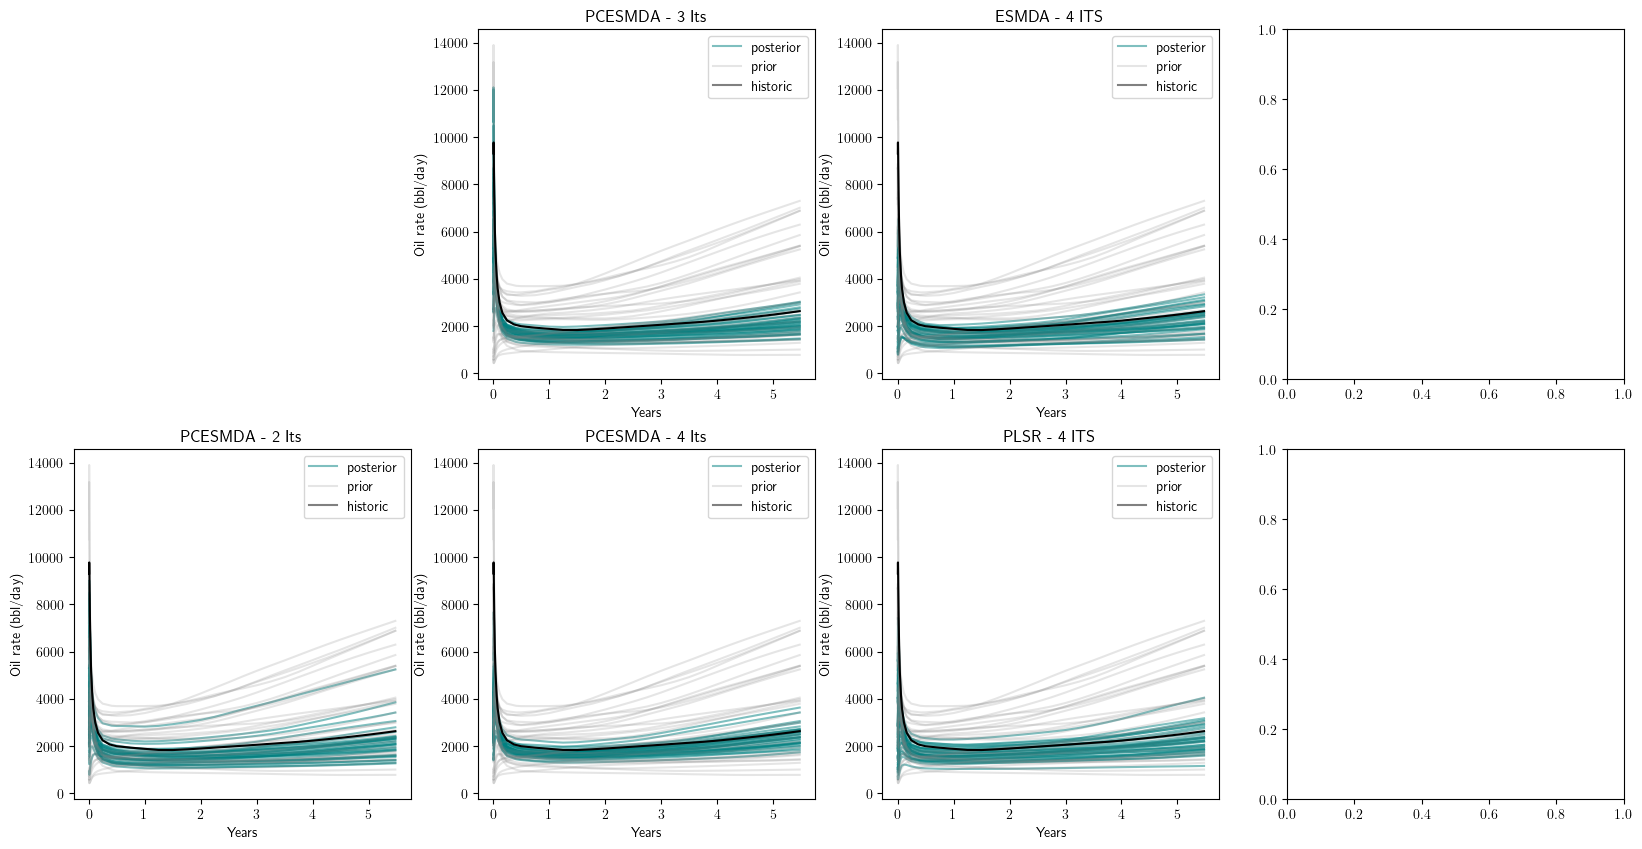

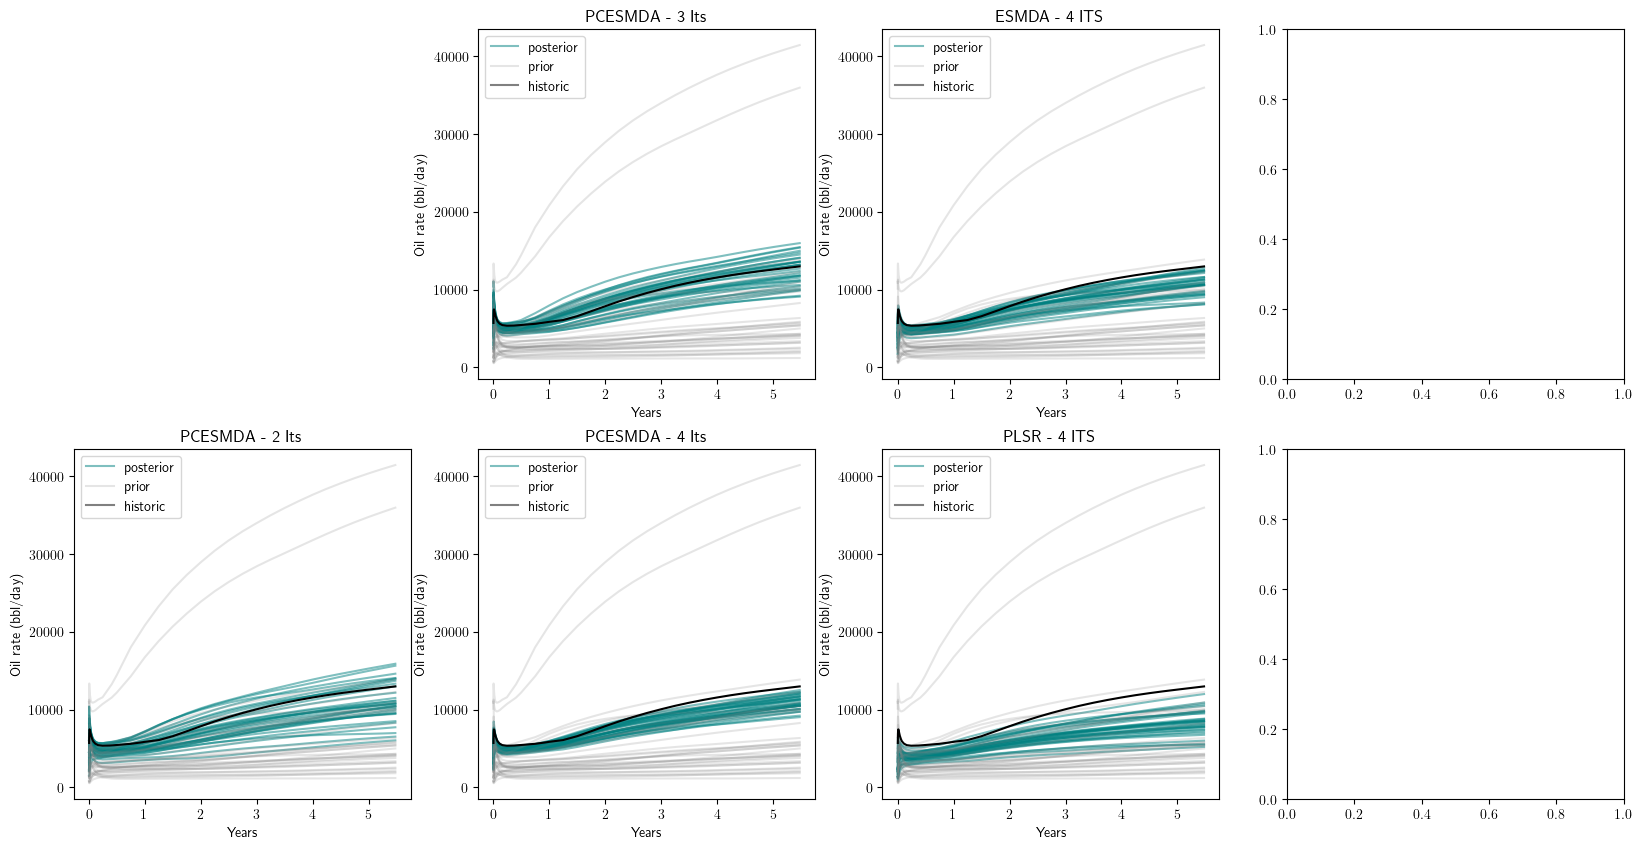

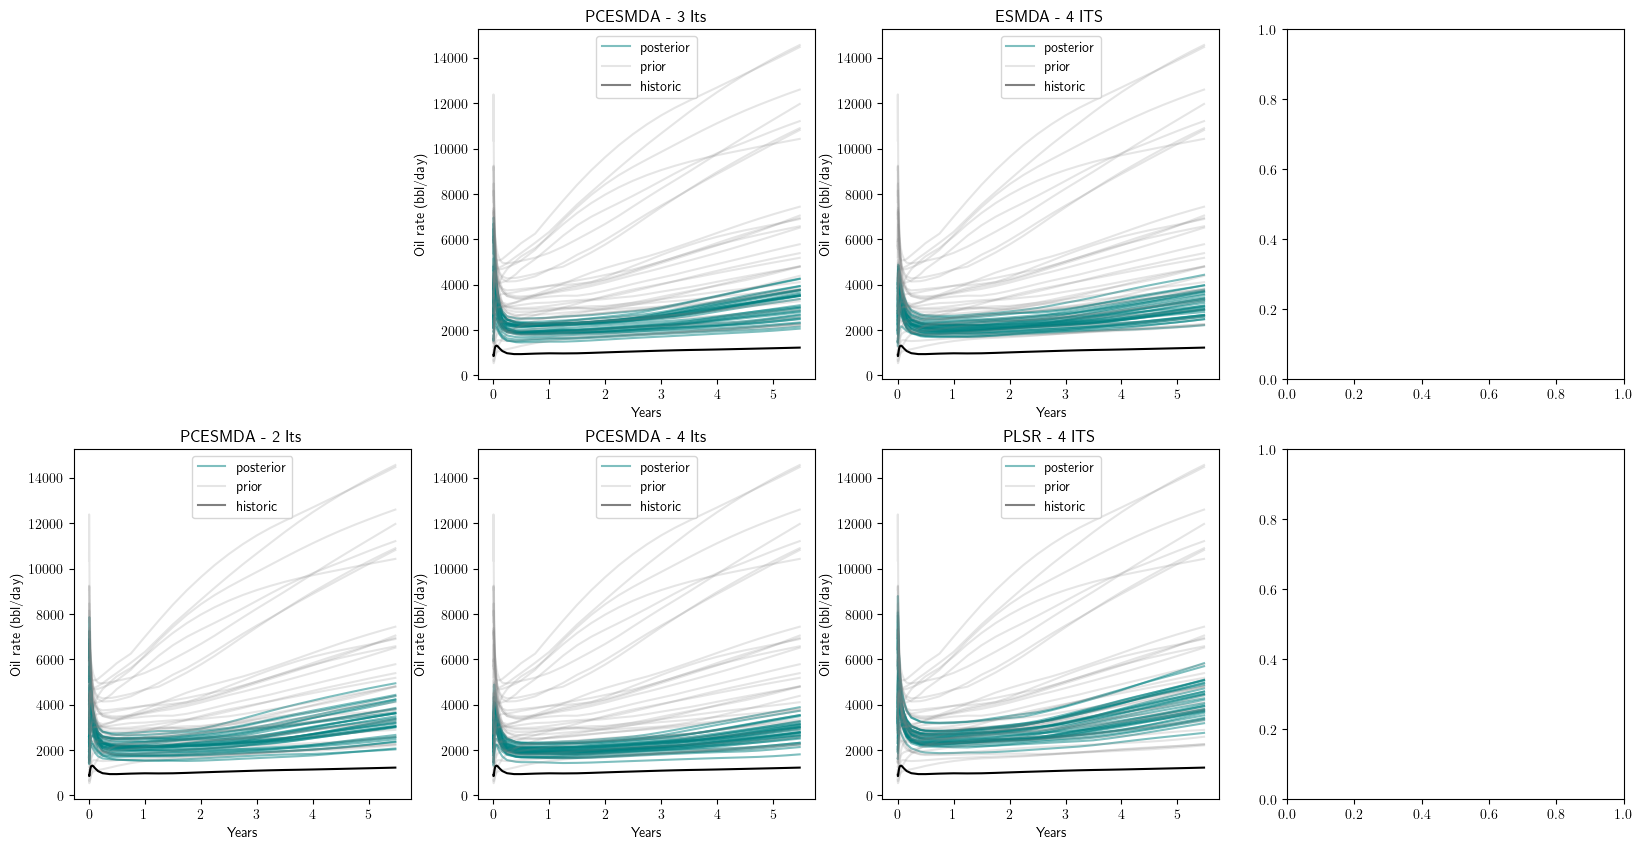

In [142]:
# plot total production

kws = [
    f"WWIR:I1",
    f"WWIR:I2",
    f"WWIR:I3",
]

props = [f"summarypost_{kw}.npy" for kw in kws]
prior_props = [f"summaryprior_{kw}.npy" for kw in kws]

historic_path = f'./data/SPE10/spe10model2/historic_data/'
hist_props = [os.path.join(historic_path, 'summary', f"{kw}.npy") for kw in kws]

for prop, prior_prop, hist_prop in zip(props, prior_props, hist_props):
    fig, ax = plt.subplots(2,4, figsize=(20,10))
    ax[0,0].axis('off')

    for k, studyname in enumerate(studynames):
        
        i,j = indexing[k]
        foldername = os.path.join(globalfolder, studyname)
        
        arrs = []
        prior_arrs = []
        hist_arrs = []
        
        filename = f"{prop}"
        arrs = np.load(os.path.join(foldername, filename))
        
        filename = f"{prior_prop}"
        prior_arrs = np.load(os.path.join(foldername, filename))
        
        hist_arrs = np.load(hist_prop)
            
        arrs = np.array(arrs).T
        
        prior_arrs = np.array(prior_arrs).T
        
        hist_arrs = np.array(hist_arrs).T
        hist_years = np.load(os.path.join(historic_path, 'summary', 'YEARS.npy'))

        base_years = np.load(os.path.join(foldername, f"summarypost_YEARS.npy"))
        
        ax[i,j].plot(base_years, arrs, color='teal', alpha=0.5)
        ax[i,j].plot(base_years, prior_arrs, color='gray', alpha=0.2)
        ax[i,j].plot(hist_years, hist_arrs, color='black', alpha=1.0)
        ax[i,j].set_title(naming[k])
        ax[i,j].set_xlabel('Years')
        ax[i,j].set_ylabel('Oil rate (bbl/day)')
        
        ax[i,j].plot([], [], color='teal', alpha=0.5, label='posterior')
        ax[i,j].plot([], [], color='gray', alpha=0.2, label='prior')
        ax[i,j].plot([], [], color='gray', alpha=1.0, label='historic')
        
        ax[i,j].legend()
    
# ax[0,0].plot()

# OF boxplot

Compare the OF of all the methods from N = 10 different initial ensembles

[Text(1, 0, 'PCESMDA_1_ITS_3'),
 Text(2, 0, 'PCESMDA_2_ITS_3'),
 Text(3, 0, 'PCESMDA_3_ITS_3'),
 Text(4, 0, 'PCESMDA_4_ITS_3'),
 Text(5, 0, 'ESMDA_2_ITS_3'),
 Text(6, 0, 'ESMDA_4_ITS_3'),
 Text(7, 0, 'PLSR_4_ITS_3')]

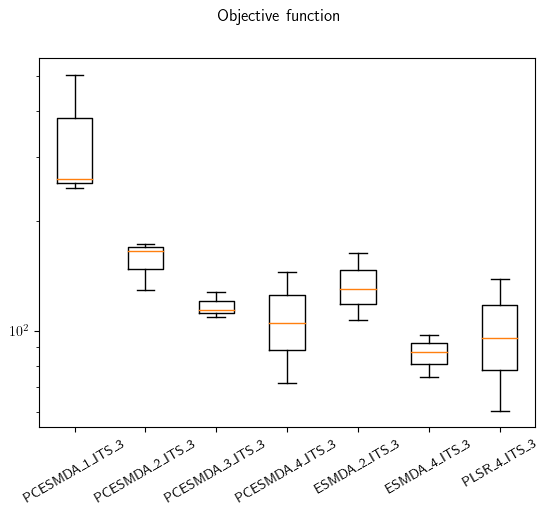

In [146]:
import src.utils.utilities as u
# studyname = f'PLSR_3_CPS_2_ITS_2_PO_10'


kws = [
    f"WOPR:P1",
    f"WOPR:P2",
    f"WOPR:P3",
    f"WOPR:P4",
    f"WWCT:P1",
    f"WWCT:P2",
    f"WWCT:P3",
    f"WWCT:P4",
    f"WWIR:I1",
    f"WWIR:I2",
    f"WWIR:I3",
]
def of(studyname, kws):
    
    foldername = os.path.join(globalfolder, studyname)
    
    props = [f"summarypost_{kw}.npy" for kw in kws]
    prior_props = [f"summaryprior_{kw}.npy" for kw in kws]

    historic_path = f'./data/SPE10/spe10model2/historic_data/'
    hist_props = [os.path.join(historic_path, 'summary', f"{kw}.npy") for kw in kws]

    of = 0
    for prop, prior_prop, hist_prop in zip(props, prior_props, hist_props):
        filename = f"{prop}"
        prior_filename = f"{prior_prop}"
        
        prior_arrs = np.load(os.path.join(foldername, prior_filename))
        
        arrs = np.load(os.path.join(foldername, filename))
        base_years = np.load(os.path.join(foldername, f"summarypost_YEARS.npy"))
        
        hist_arrs = np.load(hist_prop)
        hist_years = np.load(os.path.join(historic_path, 'summary', 'YEARS.npy'))
        
        hist_arrs = u.resample(base_years, hist_years, hist_arrs)
        
        prior_diff = hist_arrs - prior_arrs
        diff = hist_arrs - arrs
        std = np.std(prior_diff, axis=0)
        
        ind_feasible = std > 1E-6
        
        # print(np.sum(1/std[ind_feasible]))
        
        norm_diff = diff[:,ind_feasible]/std[ind_feasible]
        
        of += np.sum(norm_diff**2)
        
    Ne = arrs.shape[0]
    return of/Ne

ofs = []
for i in range(1,4):
    studynames = [
                    # f"TEST_ESMDA_3_CPS_4_ITS_{i}",
                    # f"TEST_PLSR_3_CPS_4_ITS_2_PO_{i}",
                    # f"TEST_PLSR_3_CPS_4_ITS_1_PO_{i}",
                    # # f"TEST",
                    # f"PCESMDA_3_ITS_1",
                    # f"TEST_FICA_3_CPS_4_ITS_1_PO_{i}",
                    # f"TEST_PCA_3_CPS_4_ITS_2_PO_{i}",
                    # f"TEST_PCA_3_CPS_4_ITS_1_PO_{i}"
                    f"PCESMDA_1_ITS_{i}",
                    f"PCESMDA_2_ITS_{i}",
                    f"PCESMDA_3_ITS_{i}",
                    f"PCESMDA_4_ITS_{i}",
                    f"ESMDA_2_ITS_{i}",
                    f"ESMDA_4_ITS_{i}",
                    f"PLSR_4_ITS_{i}"
                ]
    
    dummy_ofs = []
    for studyname in studynames:
        dummy_ofs.append(of(studyname, kws))
    
    ofs.append(dummy_ofs)

ofs = np.array(ofs)

fig, ax = plt.subplots()
fig.suptitle('Objective function')
ax.boxplot(ofs, showfliers=True)
ax.set_yscale('log')
# ax.set_xticklabels([naming[k] for k in range(7)], rotation=30)
ax.set_xticklabels(studynames, rotation=30)

